# Example 14: Protein Sequence Classification

In this example, we will see how to use KAN in protein sequence classification. We will be using one hot encoding to encode the amino acids. The classification codes inherited from Example_3.

#### This is just an example how it can be used for protein sequences. Need to use real data to actually observe the performance

In [1]:
from kan import *
import torch
import random
import numpy as np

In [38]:
# Hyperparameters
PROTEIN_WINDOW_SIZE = 11 

# define the universe of possible input amino acids, ie. vocab list
aa_list = 'ARNDCQEGHILKMFPSTWYVX'

In [39]:
def one_hot_encode(protein_sequence):
    """
    One-hot encodes a protein sequence.

    Args:
        protein_sequence (str): The input protein sequence.

    Returns:
        numpy.array: The one-hot encoded representation of the protein sequence.
    """
    # Create a dictionary mapping amino acids to indices
    aa_to_index = {aa: i for i, aa in enumerate(aa_list)}
    
    # Initialize an array of zeros with shape (sequence_length, alphabet_length)
    encoding = np.zeros((len(protein_sequence), len(aa_list)))
    
    # Iterate over the protein sequence and set the corresponding index to 1
    for i, aa in enumerate(protein_sequence):
        if aa in aa_to_index:
            encoding[i, aa_to_index[aa]] = 1
        else:
            # If the amino acid is not in the alphabet, set the last index to 1 (unknown)
            encoding[i, -1] = 1
    
    return encoding

In [36]:
def generate_sample_protein_dataset(num_samples=10):
    """
    Generate a dataset of protein sequences of length 11, keeping Lysine(K) in the center. 

    Args:
        num_samples (int): Number of samples to generate.

    Returns:
        dict: A dictionary containing train_input, test_input, train_label, and test_label.
    """
    
    dataset = {'train_input': [], 'test_input': [], 'train_label': [], 'test_label': []}
    alphabet = 'ARNDCQEGHILKMFPSTWYVX'

    # Generate half of the samples with label 1 and half with label 0
    label_sequence = [1] * (num_samples // 2) + [0] * (num_samples // 2)
    random.shuffle(label_sequence)

    for label in label_sequence:
        # Generate a protein sequence with 'K' in the middle
        sequence = ''.join(random.choices(alphabet.replace('K', ''), k=PROTEIN_WINDOW_SIZE//2)) + 'K' + ''.join(random.choices(alphabet.replace('K', ''), k=PROTEIN_WINDOW_SIZE//2))
        encoded_sequence = one_hot_encode(sequence).flatten()

        # Split the dataset into train and test (50% each)
        if len(dataset['train_input']) < num_samples // 2:
            dataset['train_input'].append(encoded_sequence)
            dataset['train_label'].append(label)
        else:
            dataset['test_input'].append(encoded_sequence)
            dataset['test_label'].append(label)

    # Convert lists to tensors
    dataset['train_input'] = torch.tensor(dataset['train_input'])
    dataset['test_input'] = torch.tensor(dataset['test_input'])
    dataset['train_label'] = torch.tensor(dataset['train_label']).view(-1, 1)
    dataset['test_label'] = torch.tensor(dataset['test_label']).view(-1, 1)

    return dataset

# Generate dataset with 10 samples
dataset = generate_sample_protein_dataset(10)

In [40]:
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

results = model.train(dataset, opt="LBFGS", steps=10, metrics=(train_acc, test_acc));
results['train_acc'][-1], results['test_acc'][-1]

train loss: 3.74e-09 | test loss: 7.13e-01 | reg: 7.09e+01 : 100%|██| 10/10 [00:15<00:00,  1.53s/it]


(1.0, 0.4000000059604645)

### This is just an example how it can be used for protein sequences. Need to use real data to actually observe the performance

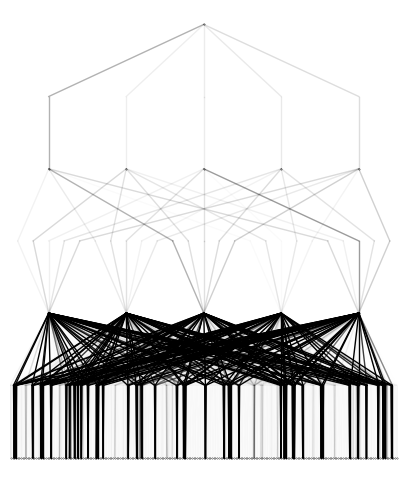

In [41]:
model.plot()